# Depression Analysis Notebook

This notebook performs data preprocessing, exploratory data analysis (EDA), data imputation, categorical encoding, and regression modeling to predict the target variable `Depression`. Irrelevant columns such as `Name`, `Id`, and `CGPA` are removed before analysis.

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting in Jupyter Notebook
%matplotlib inline

In [8]:
# Load the datasets
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# Display basic information about the training dataset
print('Training Dataset Shape:', train_df.shape)
print('Training Dataset Info:')
train_df.info()

print('First few rows of the training dataset:')
train_df.head()

Training Dataset Shape: (140700, 20)
Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## 0. Remove Irrelevant Columns

The following cell removes columns that are not expected to impact the target variable `Depression` (such as `Name`, `Id`, and `CGPA`). Adjust the list as needed based on your domain knowledge.

In [9]:
# List of irrelevant columns to remove
irrelevant_cols = ['Name', 'Id', 'CGPA']

# Drop the irrelevant columns (errors='ignore' will skip any missing columns)
train_df = train_df.drop(columns=irrelevant_cols, errors='ignore')

print('Data after removing irrelevant columns:')
print(train_df.head())

Data after removing irrelevant columns:
   id  Gender   Age           City Working Professional or Student  \
0   0  Female  49.0       Ludhiana            Working Professional   
1   1    Male  26.0       Varanasi            Working Professional   
2   2    Male  33.0  Visakhapatnam                         Student   
3   3    Male  22.0         Mumbai            Working Professional   
4   4  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  Study Satisfaction  \
0              Chef                NaN            5.0                 NaN   
1           Teacher                NaN            4.0                 NaN   
2               NaN                5.0            NaN                 2.0   
3           Teacher                NaN            5.0                 NaN   
4  Business Analyst                NaN            1.0                 NaN   

   Job Satisfaction     Sleep Duration Dietary Habits   Degree  \
0         

## 1. Exploratory Data Analysis (EDA)

This cell provides an overview of the dataset: basic information, descriptive statistics, missing values, and visualizations for both numerical and categorical features.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   Study Satisfaction                     27897 non-null   float64
 9   Job Satisfaction                       112790 non-null  float64
 10  Sleep Duration                     

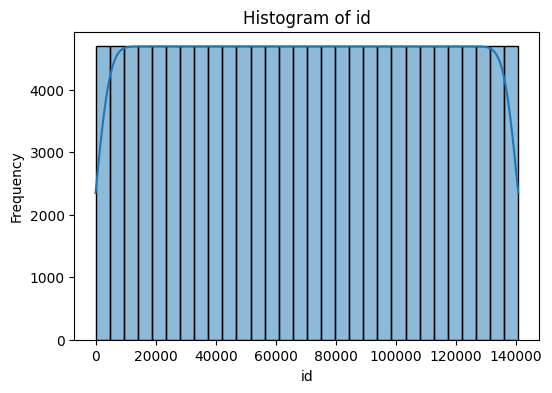

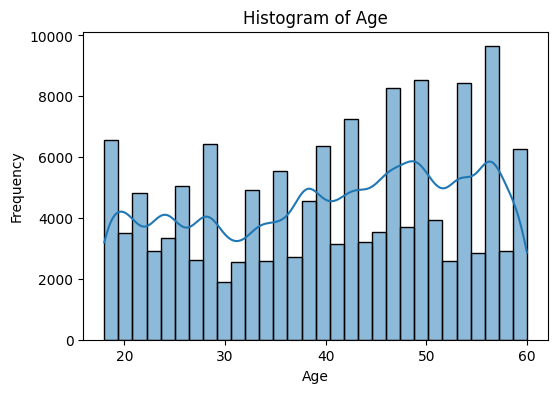

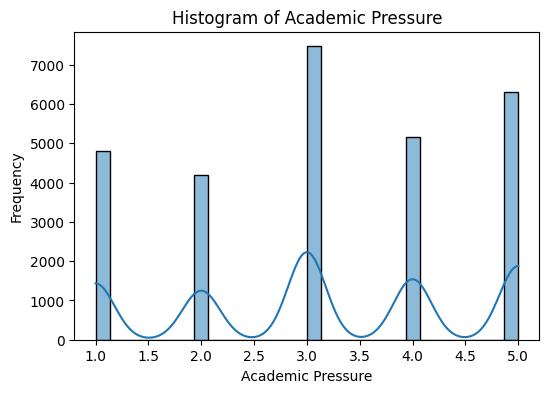

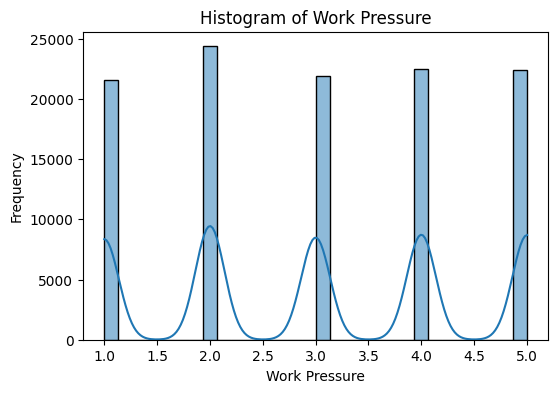

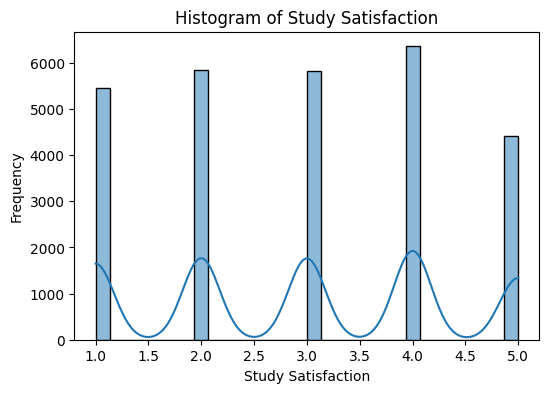

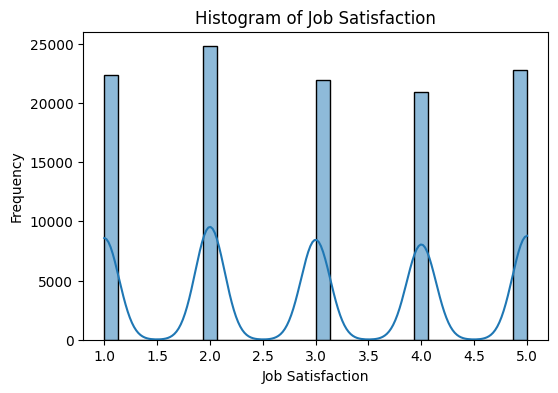

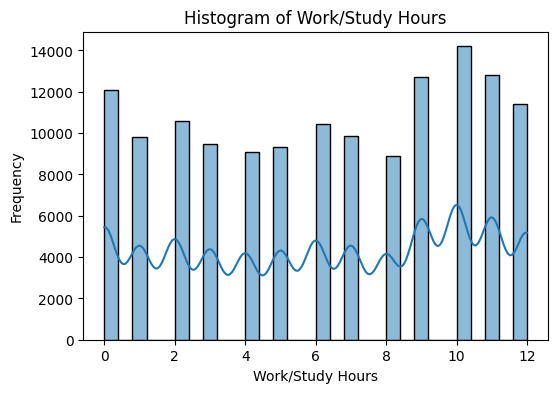

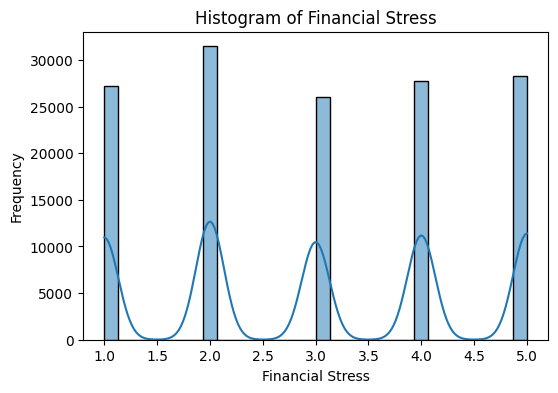

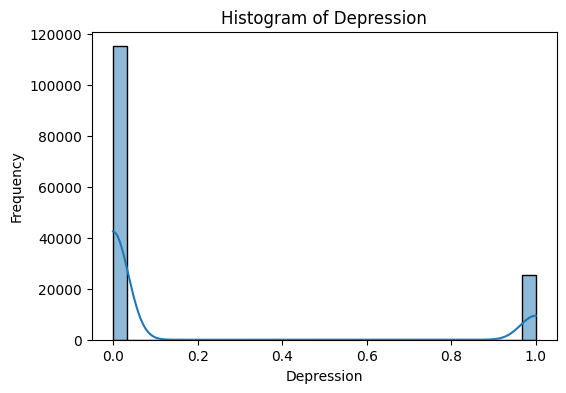

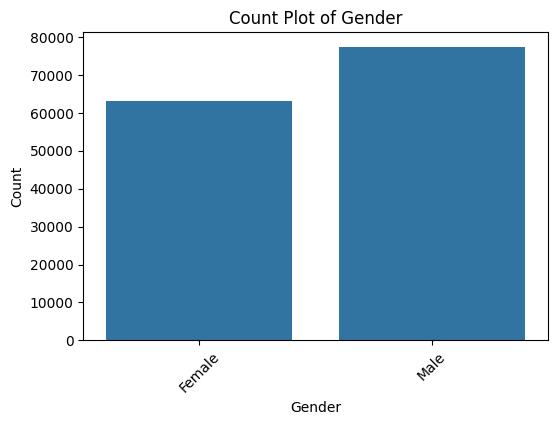

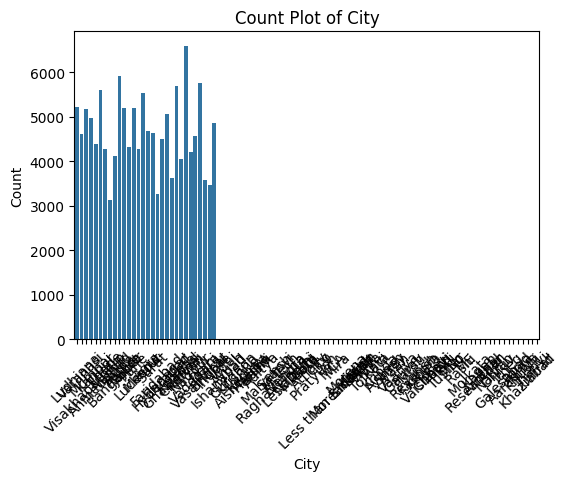

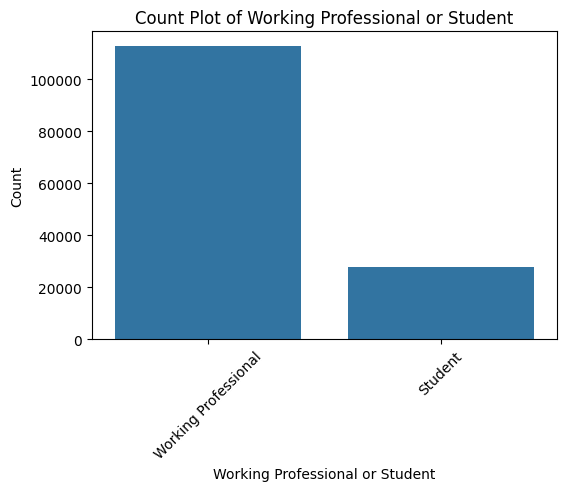

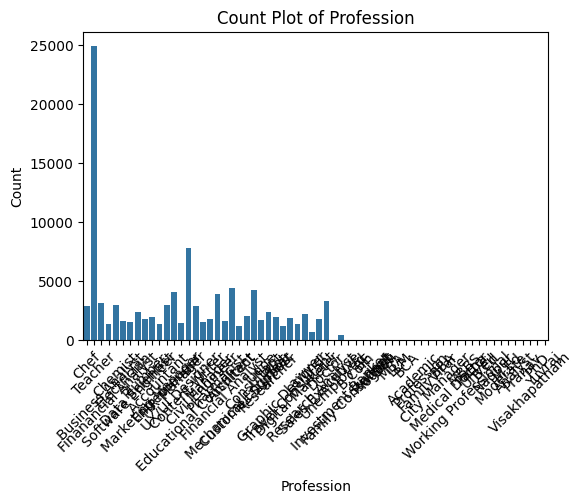

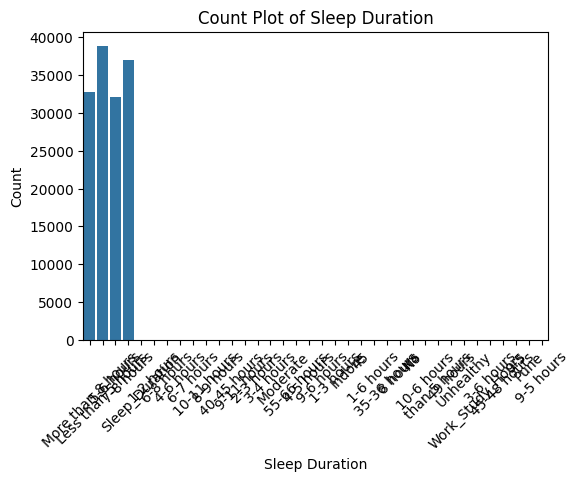

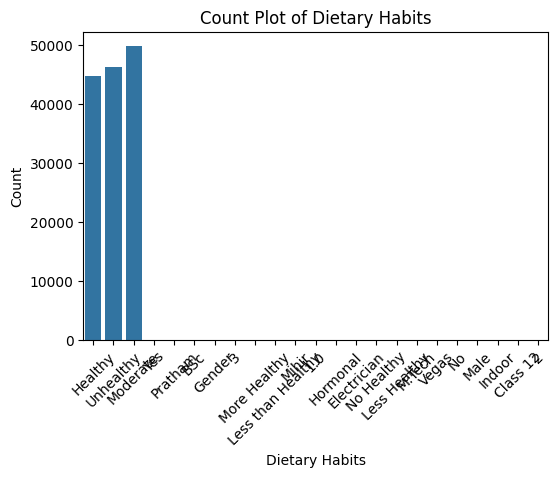

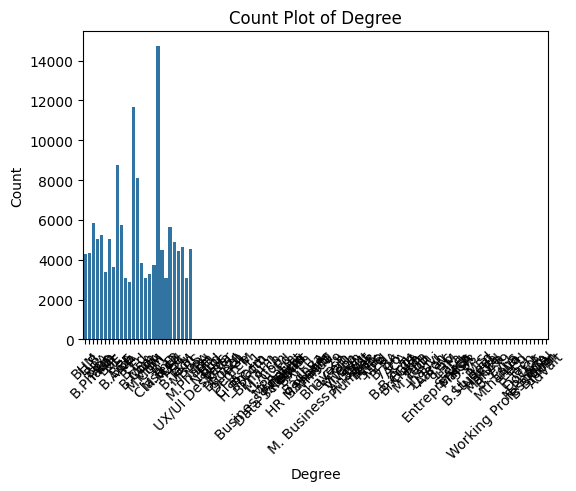

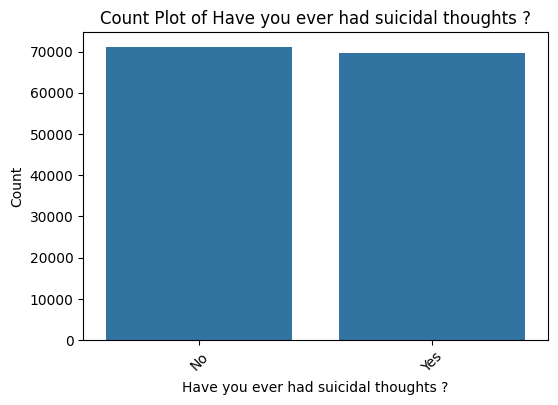

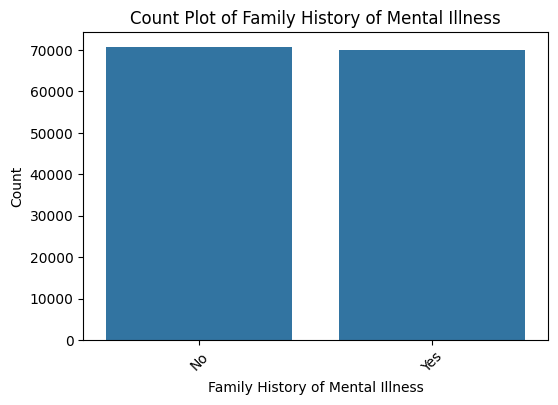

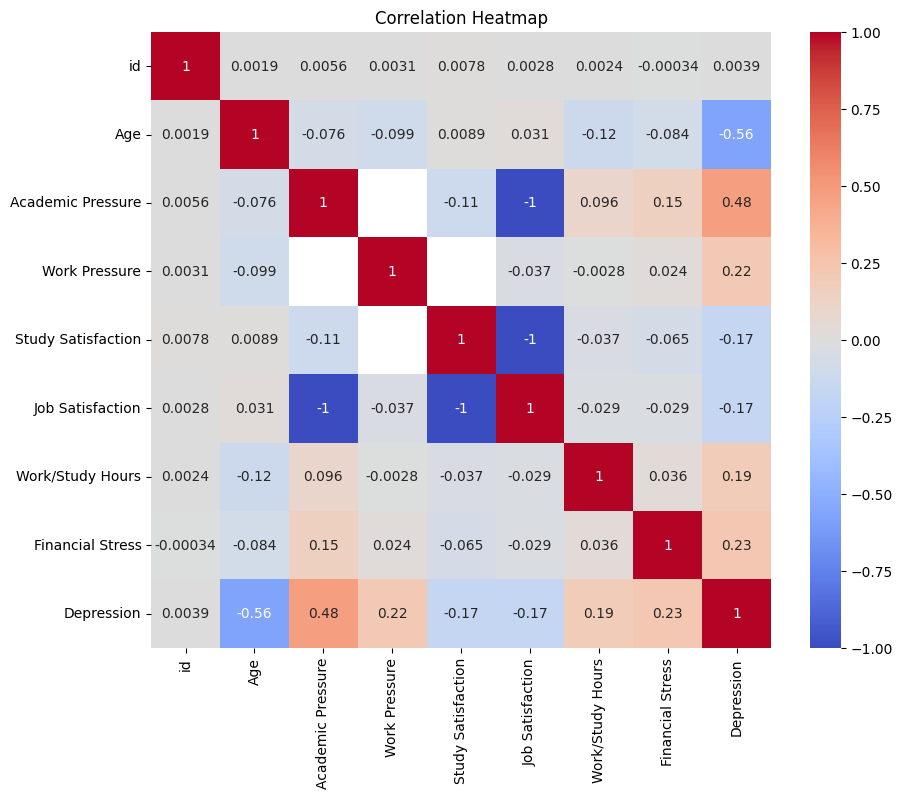

In [10]:
# Basic information and descriptive statistics
print('Dataset Information:')
print(train_df.info())

print('\nSummary Statistics:')
print(train_df.describe())

# Check for missing values in each column
print('\nMissing Values per Column:')
print(train_df.isnull().sum())

# Identify numerical and categorical columns
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print('\nNumerical columns:', num_cols)
print('Categorical columns:', cat_cols)

# Visualization: Histograms for numerical features
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Visualization: Count plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=train_df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## 2. Data Imputation

We use `SimpleImputer` to fill missing values. The strategy here is to use the median for numerical features (suitable for skewed data) and the most frequent value for categorical features. Please verify these strategies make sense for your data.

In [11]:
from sklearn.impute import SimpleImputer

# Impute missing numerical values using median
num_imputer = SimpleImputer(strategy="median")
train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])

# Impute missing categorical values using the most frequent value
cat_imputer = SimpleImputer(strategy="most_frequent")
train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])

print('Missing values after imputation:')
print(train_df.isnull().sum())

Missing values after imputation:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


## 3. Encoding Categorical Features using sklearn's OneHotEncoder

Here, a `ColumnTransformer` is used to apply one-hot encoding to the categorical features (dropping the first category to avoid the dummy variable trap) while passing the numerical features unchanged.

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a column transformer for one-hot encoding of categorical features
ct = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder="passthrough"
)

# Fit and transform the dataset
df_encoded_array = ct.fit_transform(train_df)

# Retrieve the new feature names from the OneHotEncoder
encoded_cat_cols = ct.named_transformers_["cat"].get_feature_names_out(cat_cols)

# The numerical (passthrough) columns remain in their original order
remainder_cols = [col for col in train_df.columns if col not in cat_cols]
all_columns = list(encoded_cat_cols) + remainder_cols

# Convert the array back to a DataFrame
df_encoded = pd.DataFrame(df_encoded_array, columns=all_columns)

# Ensure that columns are numeric if possible
df_encoded = df_encoded.apply(pd.to_numeric, errors='ignore')

print("\nData After Imputation and One-Hot Encoding:")
print(df_encoded.head())
print("\nData Types:")
print(df_encoded.dtypes)


Data After Imputation and One-Hot Encoding:
   Gender_Male  City_Aaradhya  City_Aditya  City_Agra  City_Ahmedabad  \
0          0.0            0.0          0.0        0.0             0.0   
1          1.0            0.0          0.0        0.0             0.0   
2          1.0            0.0          0.0        0.0             0.0   
3          1.0            0.0          0.0        0.0             0.0   
4          0.0            0.0          0.0        0.0             0.0   

   City_Aishwarya  City_Anvi  City_Armaan  City_Atharv  City_Ayansh  ...  \
0             0.0        0.0          0.0          0.0          0.0  ...   
1             0.0        0.0          0.0          0.0          0.0  ...   
2             0.0        0.0          0.0          0.0          0.0  ...   
3             0.0        0.0          0.0          0.0          0.0  ...   
4             0.0        0.0          0.0          0.0          0.0  ...   

   Family History of Mental Illness_Yes   id   Age  Academi

/var/folders/2k/n1kmf9ns0dx49077c14tclgr0000gn/T/ipykernel_59934/2336136363.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_encoded = df_encoded.apply(pd.to_numeric, errors='ignore')


## 4. Regression Modeling

We now train several regression models to predict the `Depression` target variable. The dataset is split into training and testing sets, and models include Linear Regression, Ridge, Lasso, Decision Tree, Random Forest, and Gradient Boosting.

Training data after removing irrelevant columns:
   id  Gender   Age           City Working Professional or Student  \
0   0  Female  49.0       Ludhiana            Working Professional   
1   1    Male  26.0       Varanasi            Working Professional   
2   2    Male  33.0  Visakhapatnam                         Student   
3   3    Male  22.0         Mumbai            Working Professional   
4   4  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  Study Satisfaction  \
0              Chef                NaN            5.0                 NaN   
1           Teacher                NaN            4.0                 NaN   
2               NaN                5.0            NaN                 2.0   
3           Teacher                NaN            5.0                 NaN   
4  Business Analyst                NaN            1.0                 NaN   

   Job Satisfaction     Sleep Duration Dietary Habits   Degree  \
0

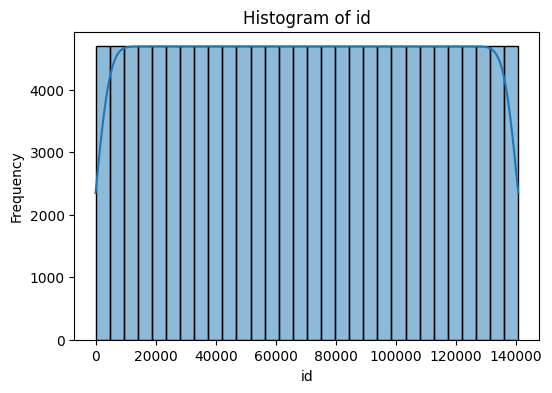

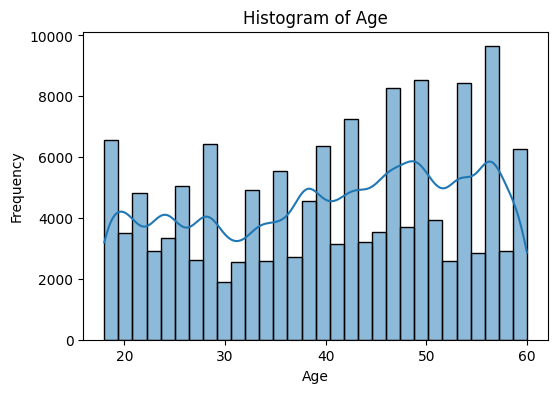

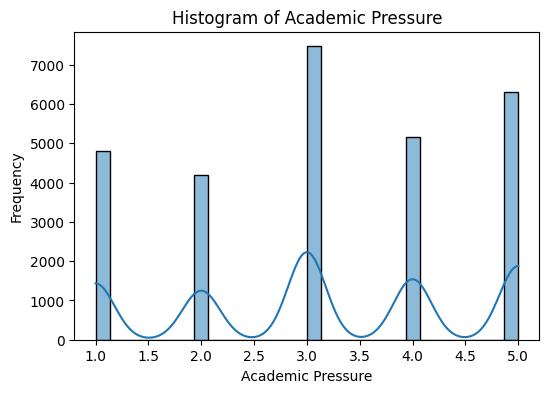

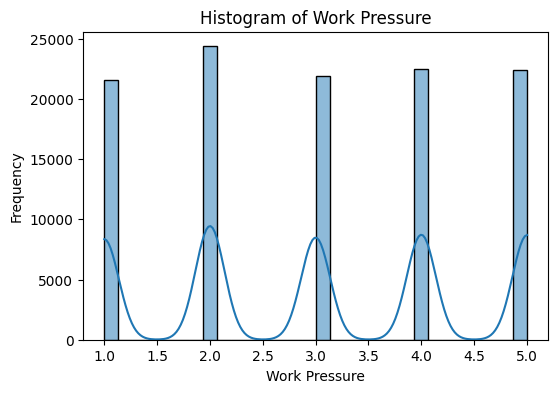

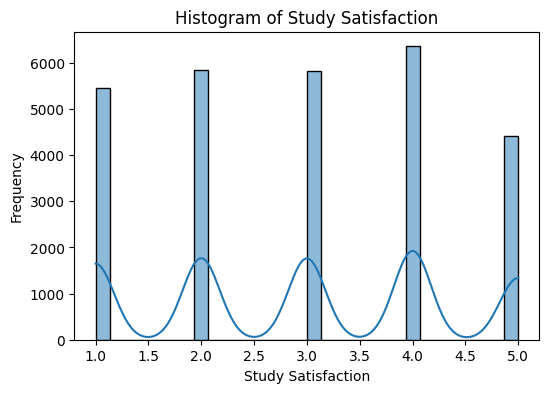

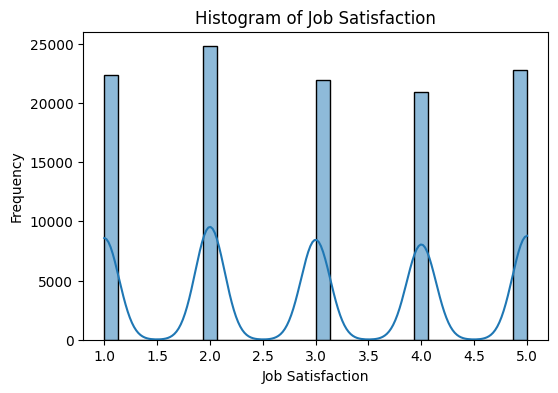

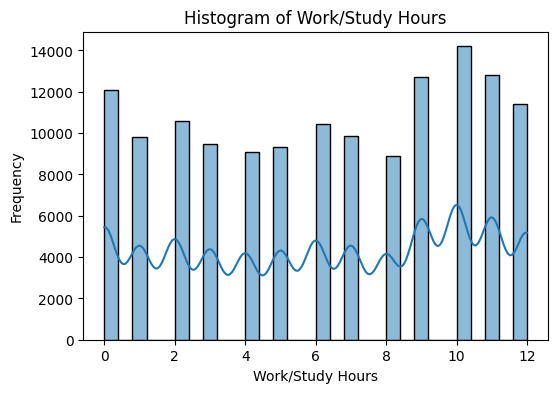

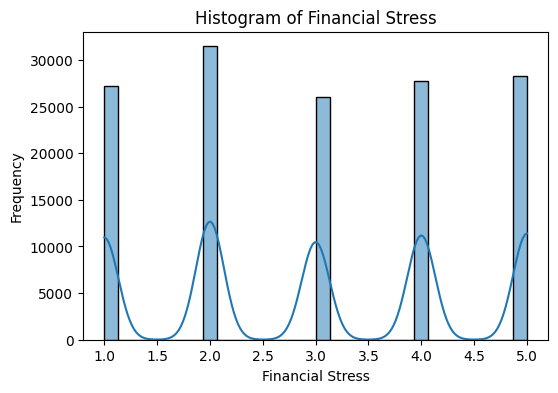

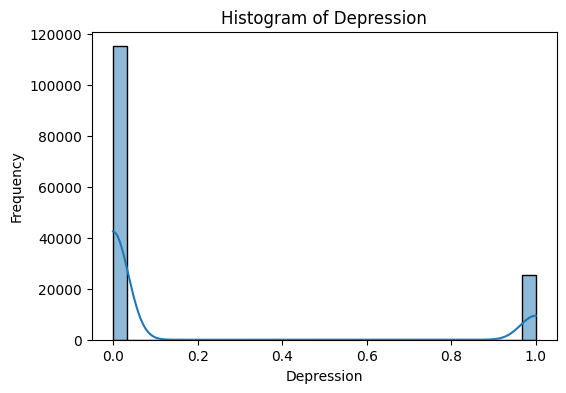

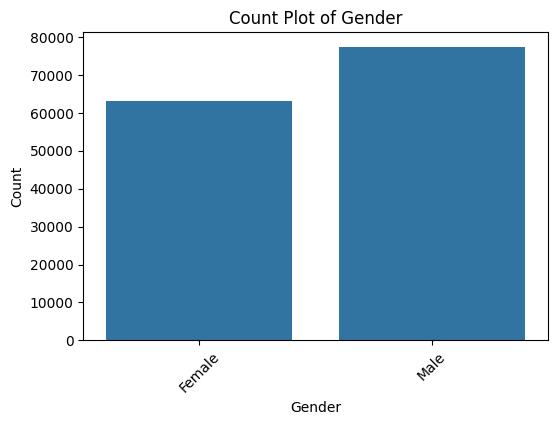

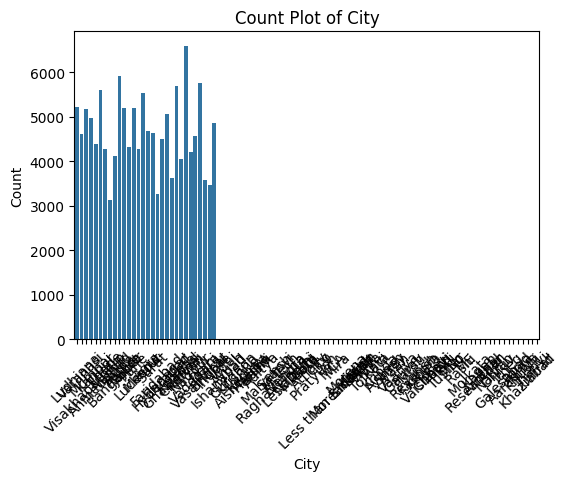

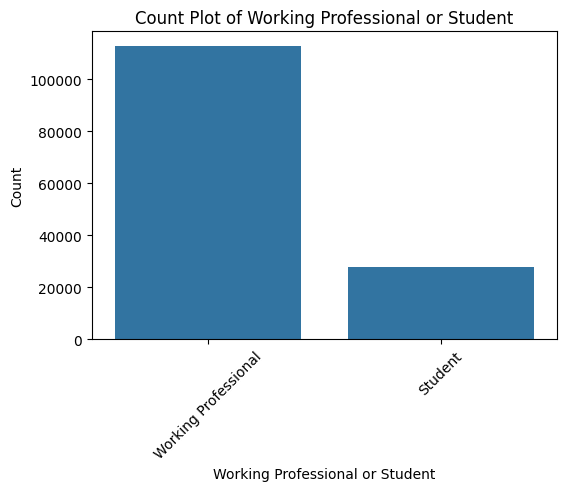

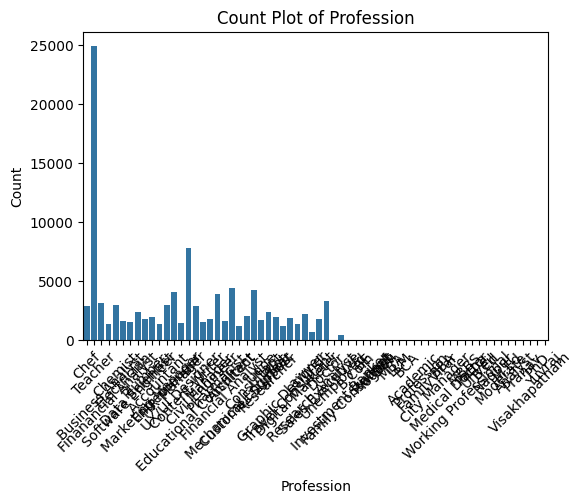

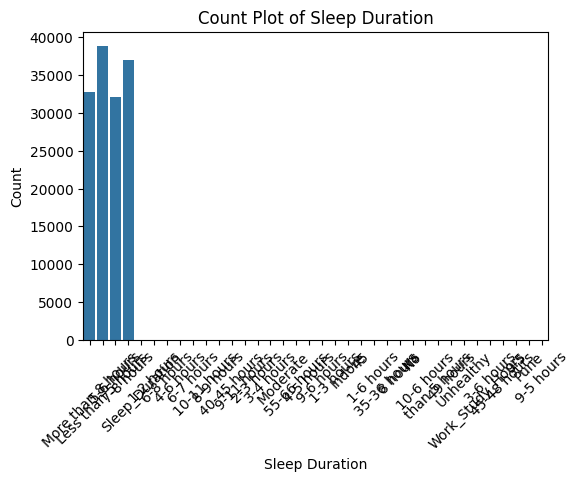

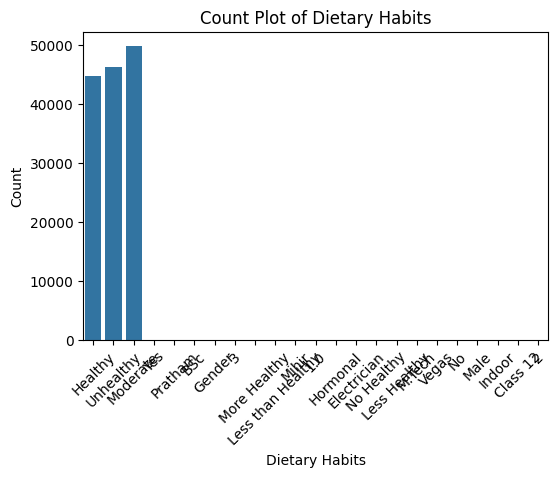

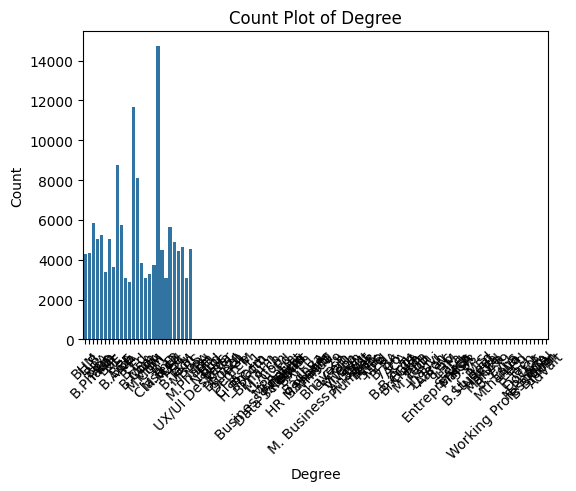

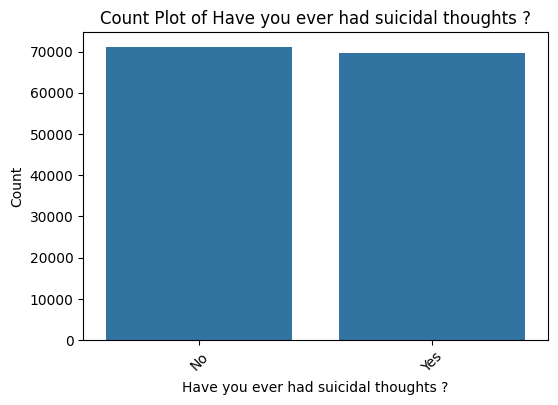

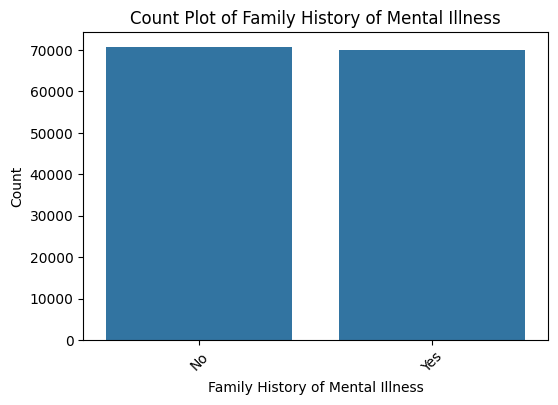

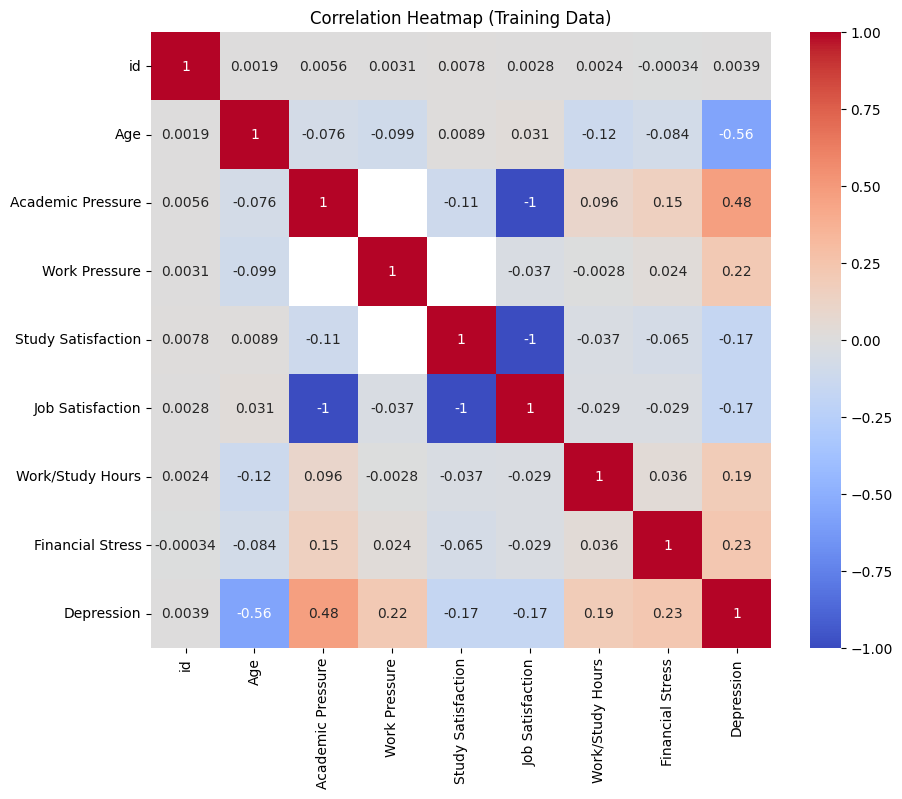

KeyError: "['Depression'] not found in axis"

In [16]:
# IMPORTANT: Change 'Depression' to the name of your target variable if necessary
target = "Depression"
if target not in df_encoded.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Separate features and target variable
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define a dictionary of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train each model and evaluate performance on the test set
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"\n{name} Results:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R^2 Score: {r2:.4f}")

# Optional: Visualize Actual vs Predicted for one of the models (Random Forest)
model_to_visualize = "Random Forest"
if model_to_visualize in models:
    model = models[model_to_visualize]
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted for {model_to_visualize}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

Data after removing irrelevant columns:
   id  Gender   Age           City Working Professional or Student  \
0   0  Female  49.0       Ludhiana            Working Professional   
1   1    Male  26.0       Varanasi            Working Professional   
2   2    Male  33.0  Visakhapatnam                         Student   
3   3    Male  22.0         Mumbai            Working Professional   
4   4  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  Study Satisfaction  \
0              Chef                NaN            5.0                 NaN   
1           Teacher                NaN            4.0                 NaN   
2               NaN                5.0            NaN                 2.0   
3           Teacher                NaN            5.0                 NaN   
4  Business Analyst                NaN            1.0                 NaN   

   Job Satisfaction     Sleep Duration Dietary Habits   Degree  \
0         

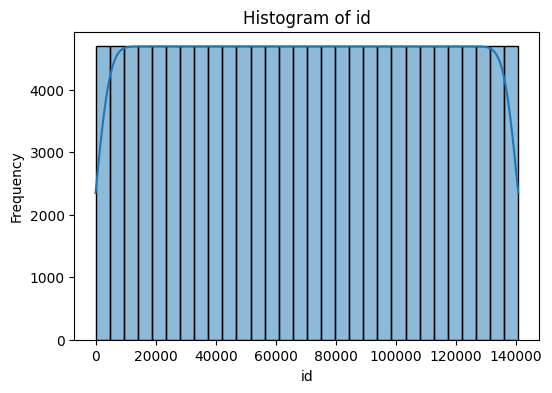

KeyboardInterrupt: 

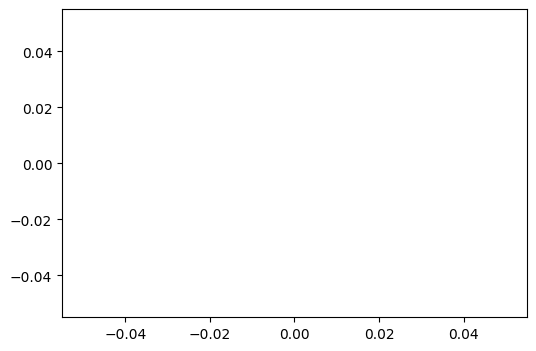

In [22]:
# %% [markdown]
# # Depression Analysis Notebook
#
# This notebook performs exploratory data analysis (EDA), preprocessing (imputation, scaling, encoding), 
# and regression modeling to predict the target variable `Depression`. Since only training data is provided, 
# we split it into training and testing sets.

# %% [code]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting in Jupyter Notebook
# %matplotlib inline

# %% [markdown]
# ## 0. Load Data and Remove Irrelevant Columns
#
# Load the data (adjust file path as needed) and remove irrelevant columns (e.g., `Name`, `Id`, `CGPA`).

# %% [code]
# Load the dataset
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# List of irrelevant columns to remove
irrelevant_cols = ['Name', 'Id', 'CGPA']

# Drop the irrelevant columns
train_df = train_df.drop(columns=irrelevant_cols, errors='ignore')

print("Data after removing irrelevant columns:")
print(train_df.head())

# %% [markdown]
# ## 1. Exploratory Data Analysis (EDA)
#
# Display basic info, summary statistics, missing values, and visualize distributions.

# %% [code]
print("Dataset Information:")
print(train_df.info())
print("\nSummary Statistics:")
print(train_df.describe())
print("\nMissing Values per Column:")
print(train_df.isnull().sum())

# Identify numerical and categorical columns from the full dataset
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
print("\nNumerical columns:", num_cols)
print("Categorical columns:", cat_cols)

# Histograms for numerical features
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(train_df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Count plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=train_df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# %% [markdown]
# ## 2. Train/Test Split
#
# Split the data into training and testing sets. The target variable is assumed to be "Depression".

# %% [code]
from sklearn.model_selection import train_test_split

target = "Depression"
if target not in train_df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

# Separate features and target
X = train_df.drop(columns=[target])
y = train_df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# %% [markdown]
# ## 3. Preprocessing Pipeline (Imputation, Scaling, and Encoding)
#
# Create a pipeline for numerical and categorical features.
# IMPORTANT: Update the column lists to remove the target variable from the feature lists.

# %% [code]
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Recompute column lists from X_train only so that the target isn't included:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Preprocessing for numerical features: impute with median, then scale
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features: impute with most frequent, then one-hot encode
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

# Combine transformations using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

# %% [markdown]
# ## 4. Model Building and Evaluation
#
# Build baseline regression models using a pipeline that includes preprocessing and evaluate on the test set.

# %% [code]
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

def create_pipeline(model):
    return Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    pipe = create_pipeline(model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"\n{name} Results:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R^2 Score: {r2:.4f}")

# %% [markdown]
# ## 5. Hyperparameter Tuning for Tree-based Models
#
# Use GridSearchCV to tune hyperparameters for Random Forest and Gradient Boosting.

# %% [code]
from sklearn.model_selection import GridSearchCV

# Tuning Random Forest
rf_pipeline = create_pipeline(RandomForestRegressor(random_state=42))
rf_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("\nRandom Forest Best Parameters:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
print("Tuned Random Forest Results:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("  R^2 Score:", r2_score(y_test, y_pred_rf))

# Tuning Gradient Boosting
gb_pipeline = create_pipeline(GradientBoostingRegressor(random_state=42))
gb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)
print("\nGradient Boosting Best Parameters:", gb_grid.best_params_)
gb_best = gb_grid.best_estimator_
y_pred_gb = gb_best.predict(X_test)
print("Tuned Gradient Boosting Results:")
print("  Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("  R^2 Score:", r2_score(y_test, y_pred_gb))

# %% [markdown]
# ## 6. Residual Analysis (Optional)
#
# Plot residuals for the tuned Random Forest and Gradient Boosting models.

# %% [code]
def plot_residuals(y_true, y_pred, title="Residual Plot"):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(title)
    plt.show()

plot_residuals(y_test, y_pred_rf, title="Residuals for Tuned Random Forest")
plot_residuals(y_test, y_pred_gb, title="Residuals for Tuned Gradient Boosting")
